# Project: Investigate a dataset - tmdb-movies dataset

## Table of contents

#### * Introduction 
#### * Data Wrangling
#### * EDA
#### * Conclusion

## Introduction

#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Questions to answer

#### 1. which movie and genre had the highest budget  and what year was it released?
#### 2 which movie generated the highest revenue and what year was it released?
#### 3. Does the movie that had the highest vote  have the highest revenue?
#### 4. which directors had the highest movie production year in year out?
#### 5. What metrics are associated to high revenue? 

## Data wrangling

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the dataset
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#checking the data information
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Out of the 21 columns available 8 of them have missing value.
#### The home page has too many missing values, which may likely affect analysis later. so i will drop it.

In [4]:
#drop the home page column
movie_df = movie_df.drop(columns='homepage')


In [5]:
#shape of the dataframe
movie_df.shape

(10866, 20)

In [6]:
#dealing with the remaining missing values using the fill method since the columns with missing values are strings
movie_df.fillna(method='ffill', inplace=True)

In [7]:
#check for missing values again
movie_df.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### No more missing values present in the data

In [8]:
#converting the release date to datetime data type
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

In [9]:
movie_df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [10]:
#Summary statistics of the data
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002206F5ACAC8>,
      dtype=object)

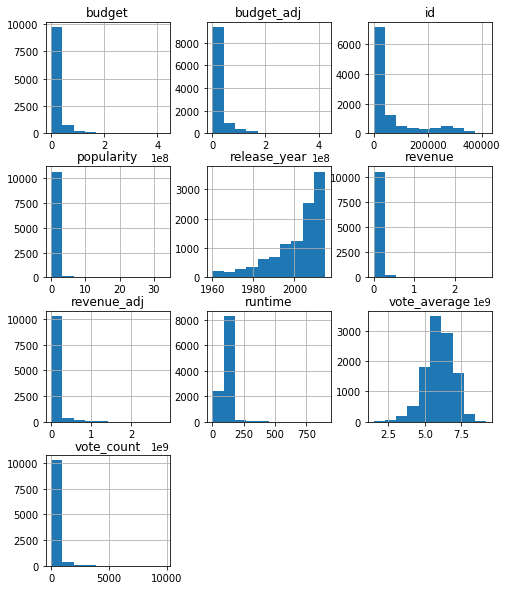

In [11]:
#histogram of the whole dataframe
movie_df.hist(figsize=(8,10))

#### From the general plot of the whole dataframe; it can be observed that most of the plots are positively skewed, except for the release year which is negatively skewed and the vote average which is as though a normal distribution.

## EDA

### Answering the questions

### Question 1

In [12]:
#QUESTION ONE ANSWER
#movie with maximum budget
max_budg_mov = movie_df[movie_df['budget'] ==  425000000]
max_budg_mov[['original_title', 'release_year', 'revenue', 'genres']]

,original_title,release_year,revenue,genres
2244,The Warrior's Way,2010,11087569,Adventure|Fantasy|Action|Western|Thriller


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002206FC97888>]],
      dtype=object)

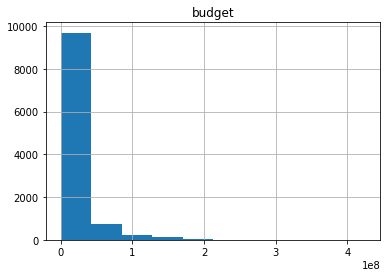

In [13]:
movie_df.hist(['budget'])

In [14]:
#percentage of movies with zero or no budget
zero_budg = movie_df[movie_df['budget'] == 0]
zero_budg_prop = zero_budg['revenue'].count()/movie_df['budget'].count()
print((zero_budg_prop*100).round(2),'%')

52.42 %


##### For the sake of observation: From the plot above about the budget distribution is skewed to the right. Also from the analysis 52.42% of the total data are movies with budget equal to zero. 

#### 1. The movie with the highest budget as high as 425000000 is 'The Warrior's Way', with genres:Adventure|Fantasy|Action|Western|Thriller, and was released in 2010. it also generated a revenue of 11087569.

#### It can be observed that the budget of the movie far surpasses the revenue generated, and so the can be said to have been more of a loss than profit.

### Question 2

In [15]:
#QUESTION TWO ANSWER
#percentage of movies with zero or no revenue generated
zero_rev = movie_df[movie_df['revenue'] ==0]
zero_rev_prop = zero_rev['revenue'].count()/movie_df['revenue'].count()
print((zero_rev_prop*100).round(2),'%')

55.37 %


In [16]:
max_mov_rev = movie_df['revenue'].max()
max_mov_rev

2781505847

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002206FD66D08>]],
      dtype=object)

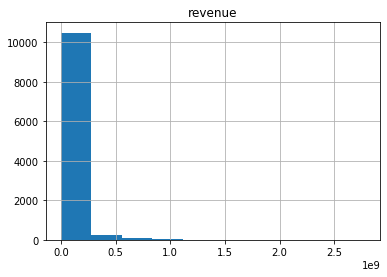

In [17]:
movie_df.hist(['revenue'])

In [18]:
#movie that generated the highest revenue
max_rev_mov = movie_df[movie_df['revenue'] ==  2781505847]
max_rev_mov[['original_title', 'release_year', 'revenue','budget']]

,original_title,release_year,revenue,budget
1386,Avatar,2009,2781505847,237000000


##### For the sake of observation: The distribution of the revenue data is also positively skewed. Also 55.37% of the movies are movies with revenue equal to zero; which means they didn't generate any revenue.

#### 2. The movie with the highest revenue is 'Avatar', with a revenue of 2781505847, and was released in 2009. 

#### Also, the initial budget of the movie was 237000000. So the revenue generated was 10x the budget value. 


### Question 3

In [19]:
# QUESTION THREE ANSWER
# Did movies with higher revenues have higher votecount?
#maximum value for movie count
max_vote = movie_df['vote_count'].max()
max_vote

9767

In [20]:
#vote count for the movie with the highest revenue
max_rev_mov['vote_count']

1386    8458
Name: vote_count, dtype: int64

In [21]:
# The movie title and revenue value for the movie with the highest votecount
max_vote_mov = movie_df[movie_df['vote_count'] == 9767]
max_vote_mov[['original_title','revenue','budget']]

,original_title,revenue,budget
1919,Inception,825500000,160000000


#### The Movie 'Inception' had the most vote count, but didn't have the highest revenue and vice versa.
#### So it is safe to say that the revenue generated is not necessarily tied to the votecount.

### Question 4

In [22]:
# Question four answer
# Which directors had the highest movie production year in year out?
#create a dataframe by grouping by the director column
dir_df = movie_df.groupby('director')

#create a column on the director dataframe as the count value for each director(s) work.
count = dir_df['id'].count()
count.max()

45

In [23]:
dir_df[['revenue']].mean()


,revenue
director,
FrÃ©dÃ©ric Jardin,3358.0
A. Todd Smith,0.0
A.R. Murugadoss,76000000.0
Aaron Aites,0.0
Aaron Blaise|Robert Walker,250.0
...,...
Ã‡aÄŸan Irmak,0.0
Ã‰mile Gaudreault,3031801.0
Ã‰ric Besnard,0.0


In [24]:
#mask the directors count dataframe so the director with the maximum count of 45 can be determined
max_dir = count[count ==45]
max_dir.head()

director
Woody Allen    45
Name: id, dtype: int64

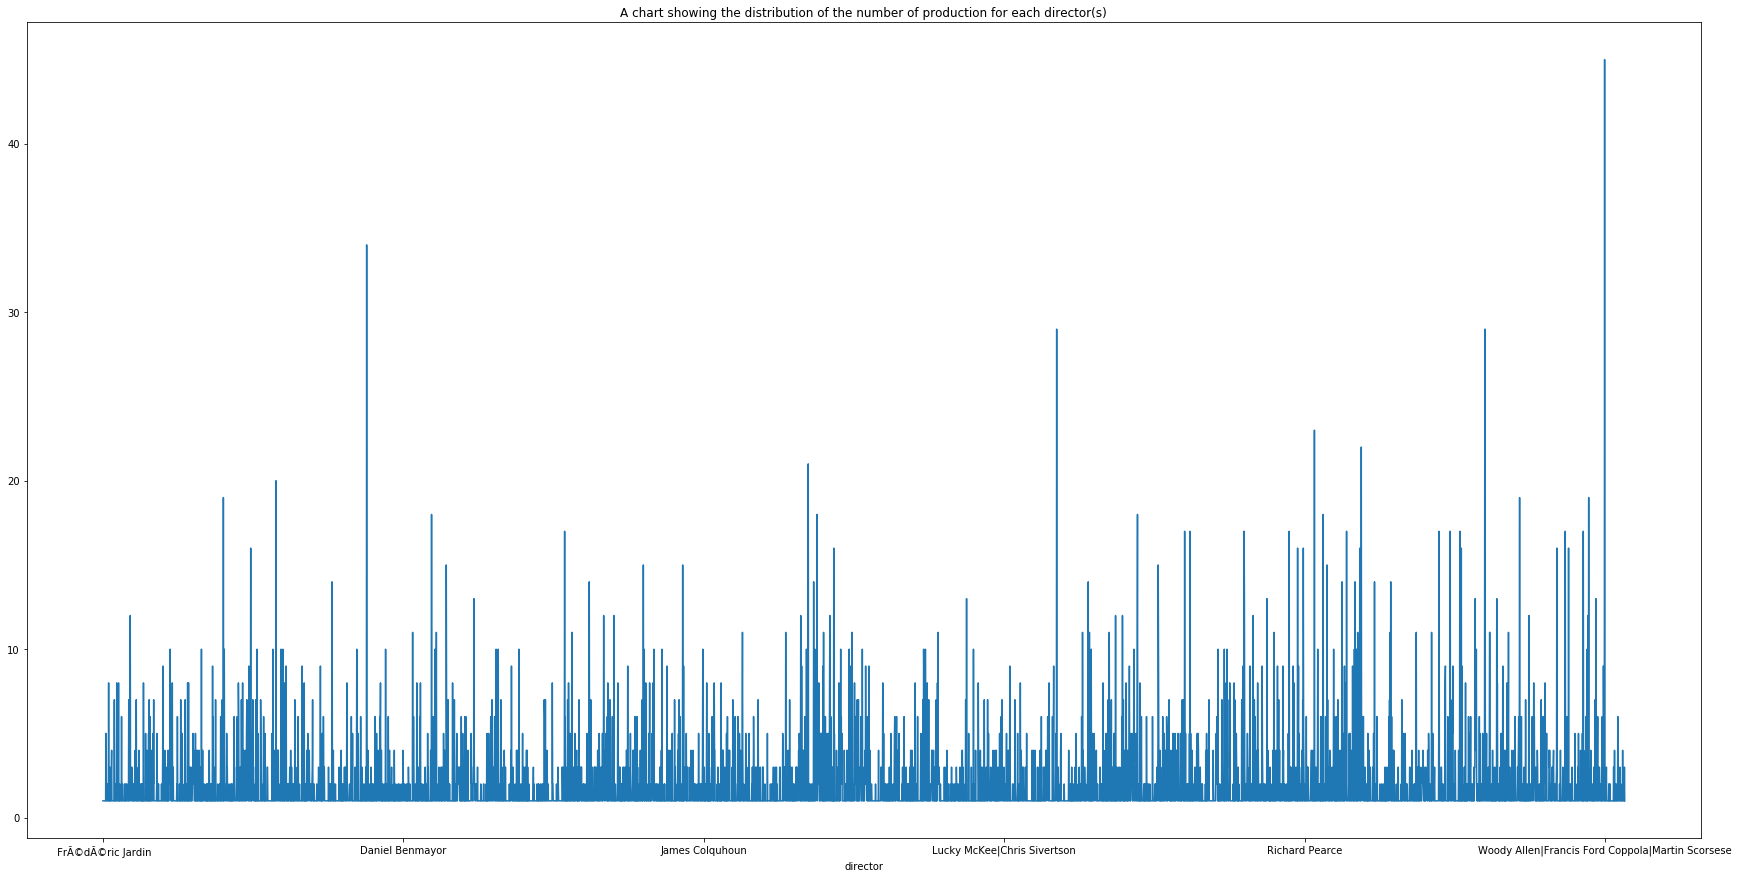

In [25]:
count.plot(figsize=(30,15),title= 'A chart showing the distribution of the number of production for each director(s)')

### The director with the highest number of production year in year out is Woody Allen with a total of 42 movies directed over time. Even though to the numerous number of directors(about 5000), the plot couldn't depict an accurate picture of the expected result.

### Question 5

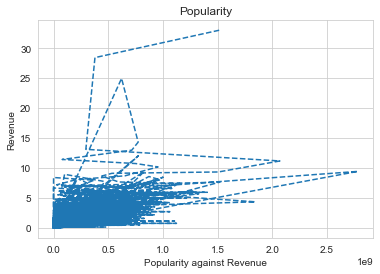

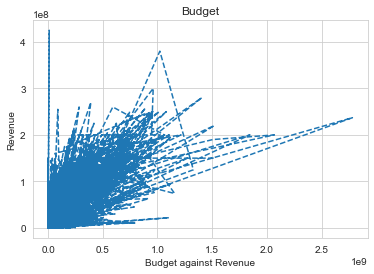

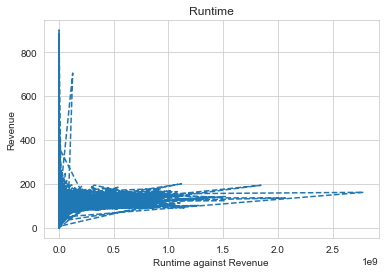

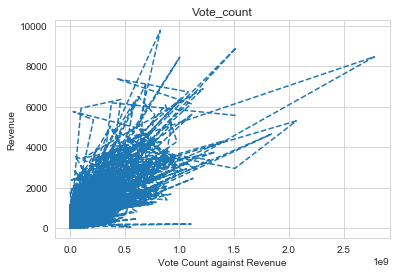

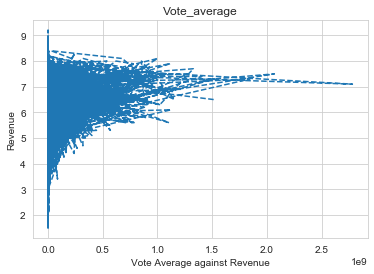

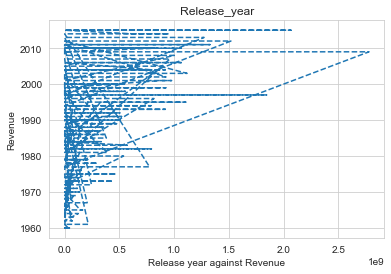

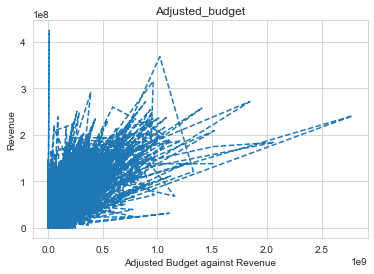

In [27]:
# Question five answer
# which metric best describes high revenue
#assigning the x and y values for the plot
x = movie_df['revenue']
y0 = movie_df['popularity']
y1 = movie_df['budget']
y2 = movie_df['runtime']
y3 = movie_df['vote_count']
y4 = movie_df['vote_average']
y5 = movie_df['release_year']
y6 = movie_df['budget_adj']
#setting the x and y labels
x_label = 'Revenue'
y_label0 = 'Popularity'
y_label1 = 'Budget'
y_label2 = 'Runtime'
y_label3 = 'Vote_count'
y_label4 = 'Vote_average'
y_label5 = 'Release_year'
y_label6 = 'Adjusted_budget'


#assigning the plot titles
title_0 = 'Popularity against Revenue'
title_1 = 'Budget against Revenue'
title_2 = 'Runtime against Revenue'
title_3 = 'Vote Count against Revenue'
title_4 = 'Vote Average against Revenue'
title_5 = 'Release year against Revenue'
title_6 = 'Adjusted Budget against Revenue'

def my_plots(x,y,x_label,y_label,titles):
    '''A function to run my plots'''
    fig,ax = plt.subplots(1,1)
    ax.plot(x,y,'--')
    ax.set_title(titles)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    sns.set_style('whitegrid')
    plt.show()
my_plots(x,y0,title_0,x_label,y_label0)
my_plots(x,y1,title_1,x_label,y_label1)
my_plots(x,y2,title_2,x_label,y_label2)
my_plots(x,y3,title_3,x_label,y_label3)
my_plots(x,y4,title_4,x_label,y_label4)
my_plots(x,y5,title_5,x_label,y_label5)
my_plots(x,y6,title_6,x_label,y_label6)

### from the plots above, it cannot be said wholeheartedly that any of the metric in this data has a direct effect on the revenue generated for any particular movie.

## Conclusion

### From the analysis done to this data, it is safe to draw some conclusions:
### 1. The movie 'Avatar' released in 2009 recorded the highest revenue over the years captured by the data.
### 2. The movie 'Inception' recorded the highest votecount by viewers, consequently not the highest revenue.
### 3. The 'Warrior's Way' had the highest budget among the entire movie produced.

### There may not be any direct correlation between any metric given in the data to the revenue recorded for any particular movie.

### Limitations/Challenges:

#### 1. I observed that the Data though large had a lot of 0 value expecially in the budget  and revenue columns, as they were my focus for the analysis.
#### 2. Making meaning from my plots was a lot of drag, because the categorical data columns had too many categories that caused the plot to be too rowdy and unsightly.
#### And very importantly, I am having serious challenge with my PC right for a while now. Also I have been going through serious financial challenge now because the loss I have suffered in recent times.


### References
#### Udacity Project cheetsheets
#### Stackoverflow

In [28]:
pip install nbconvert[webpdf]

  Attempting uninstall: certifi
    Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
      Successfully uninstalled certifi-2019.11.28
Note: you may need to restart the kernel to use updated packages.


ERROR: conda 4.10.3 requires ruamel_yaml_conda>=0.11.14, which is not installed.
